<a href="https://colab.research.google.com/github/MsAraa19/nlpLabs/blob/main/NLP_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2 Building an NLP Pipeline: From Raw Text to Processed Data

In this lab, we will be exploring how to preprocess tweets for sentiment analysis.  By the end of this lab, you will see how to use the [NLTK](http://www.nltk.org) package to perform a preprocessing pipeline for Twitter datasets.

# Learning Objectives:
By the end of this lab, you will:

1. Load and explore a Twitter dataset
2. Perform basic text preprocessing
3. Use Bag of Words and TF-IDF to represent text


## Setup
We will be using the [Natural Language Toolkit (NLTK)](http://www.nltk.org/howto/twitter.html) package, an open-source Python library for natural language processing. It has modules for collecting, handling, and processing Twitter data.

For this exercise, we will use a Twitter dataset that comes with NLTK. This dataset has been manually annotated and serves to establish baselines for models quickly.

Let us import them now as well as a few other libraries we will be using.

In [16]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random     # pseudo-random number generator
#if using nltk library what are the 3 steps: 1) import nltk 2) nltk.download 3) have name of dataset.strings
# 3 techniques for uploading dataet: download csv by pandas 2) or using nltk library or similar 3) or do web scraping

## Step 1: Loading the Twitter Dataset

The sample dataset from NLTK is separated into positive and negative tweets. It contains 5000 positive tweets and 5000 negative tweets exactly. The exact match between these classes is not a coincidence. The intention is to have a balanced dataset. That does not reflect the real distributions of positive and negative classes in live Twitter streams. However, it is better to be aware that this balance of classes is artificial.


In [17]:
# downloads sample twitter dataset. uncomment the line below if running on a local machine.
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

We can load the text fields of the positive and negative tweets by using the module's `strings()` method like this:

In [18]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

# Exercise 1

Instead of using the NLTK library to load data, try another method to load twitter data

In [19]:
# Exercise 1 Solution
import pandas as pd
data_neg= pd.read_json("negative_tweets.json", lines=True)
data_pos= pd.read_json("positive_tweets.json", lines=True)

Next, we'll print a report with the number of positive and negative tweets. It is also essential to know the data structure of the datasets

In [20]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


We can see that the data is stored in a list and as you might expect, individual tweets are stored as strings.

You can make a more visually appealing report by using Matplotlib's [pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html) library. Let us see how to create a [pie chart](https://matplotlib.org/3.2.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py) to show the same information as above. This simple snippet will serve you in future visualizations of this kind of data.

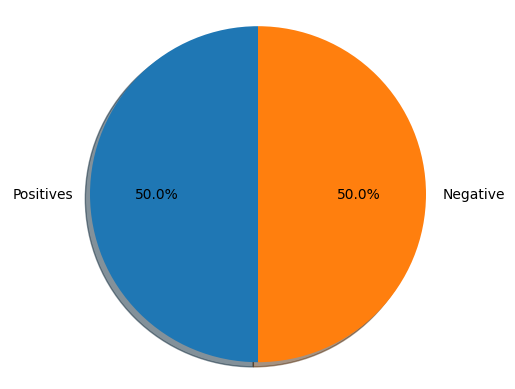

In [21]:
# Declare a figure with a custom size



# labels for the two classes
labels = 'Positives', 'Negative'

# Sizes for each slide
sizes = [len(all_positive_tweets), len(all_negative_tweets)]

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the chart
plt.show()

## Step 2: Preprocessing the Text


Before anything else, we can print a couple of tweets from the dataset to see how they look. Understanding the data is responsible for 80% of the success or failure in data science projects. We can use this time to observe aspects we'd like to consider when preprocessing our data.

Below, you will print one random positive and one random negative tweet. We have added a color mark at the beginning of the string to further distinguish the two.

In [22]:
# print positive in greeen
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])

# print negative in red
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

It doesn't affect my theory at all but I'll update the vid tomorrow just so it's made clear :)
At the hospital :(


In [23]:
# Try to print the first five line of the data using head() function
# Try to print the last five line of the data using tail() function
print("this is negative tweets dataset")
print(data_neg.head(5))
print(data_neg.tail(5))
print("this is positive tweets dataset")
print(data_pos.head(5))
print(data_pos.tail(5))

this is negative tweets dataset
   contributors coordinates  \
0           NaN        None   
1           NaN        None   
2           NaN        None   
3           NaN        None   
4           NaN        None   

                                                text  \
0                                hopeless for tmr :(   
1  Everything in the kids section of IKEA is so c...   
2  @Hegelbon That heart sliding into the waste ba...   
3  “@ketchBurning: I hate Japanese call him "bani...   
4           Dang starting next week I have "work" :(   

                                                user  retweet_count  \
0  {'screen_name': 'yuwraxkim', 'time_zone': 'Jak...              0   
1  {'screen_name': 'EveHollyHousley', 'time_zone'...              0   
2  {'screen_name': 'prostgrad', 'time_zone': 'Ath...              0   
3  {'screen_name': 'burningyoppy', 'time_zone': '...              0   
4  {'screen_name': '3angiefalangie', 'time_zone':...              0   

   favorited     

In [24]:
import pandas as pd
df_positive = pd.DataFrame(all_positive_tweets, columns=['Tweet'])
#convert data to dataframe to use pandas techniques

One observation you may have is the presence of [emoticons](https://en.wikipedia.org/wiki/Emoticon) and URLs in many of the tweets. This info will come in handy in the next steps.

Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

* Lowercasing
* Removing stop words and punctuation
* Tokenization
* Stemming
......



In [25]:
# Our selected sample. Complex enough to exemplify each step
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


Let's import a few more libraries for this purpose.

In [26]:
# download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
import re                                  # library for regular expression operations #for punctuations e.g. html tags
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

### Remove hyperlinks,  Twitter marks and styles

Since we have a Twitter dataset, we'd like to remove some substrings commonly used on the platform like the hashtag, retweet marks, and hyperlinks. We'll use the [re](https://docs.python.org/3/library/re.html) library to perform regular expression operations on our tweet. We'll define our search pattern and use the `sub()` method to remove matches by substituting with an empty character (i.e. `''`)

In [28]:
print('\033[92m' + tweet)
print('\033[94m')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


In [31]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

[link text](https://)### Tokenize the string

To tokenize means to split the strings into individual words without blanks or tabs. In this same step, we will also convert each word in the string to lower case. The [tokenize](https://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.casual) module from NLTK allows us to do these easily:

In [32]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
text = "I love NLP"
tokens = word_tokenize(text)
print(tokens)  # ['I', 'love', 'NLP']


['I', 'love', 'NLP']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [33]:
print()
print('\033[92m' + tweet2)
print('\033[94m')

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)


My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


Tokenized string:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


### Remove stop words and punctuations

The next step is to remove stop words and punctuation. Stop words are words that don't add significant meaning to the text. You'll see the list provided by NLTK when you run the cells below.

In [34]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english')

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

We can see that the stop words list above contains some words that could be important in some contexts.
These could be words like _i, not, between, because, won, against_. You might need to customize the stop words list for some applications. For our exercise, we will use the entire list.

For the punctuation, we saw earlier that certain groupings like ':)' and '...'  should be retained when dealing with tweets because they are used to express emotions. In other contexts, like medical analysis, these should also be removed.

Time to clean up our tokenized tweet!

In [35]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)



['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

removed stop words and punctuation:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


Please note that the words **happy** and **sunny** in this list are correctly spelled.

### Stemming

Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

Consider the words:
 * **learn**
 * **learn**ing
 * **learn**ed
 * **learn**t

All these words are stemmed from its common root **learn**. However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, **happi** and **sunni**. That's because it chooses the most common stem for related words. For example, we can look at the set of words that comprises the different forms of happy:

 * **happ**y
 * **happi**ness
 * **happi**er

We can see that the prefix **happi** is more commonly used. We cannot choose **happ** because it is the stem of unrelated words like **happen**.

NLTK has different modules for stemming and we will be using the [PorterStemmer](https://www.nltk.org/api/nltk.stem.html#module-nltk.stem.porter) module which uses the [Porter Stemming Algorithm](https://tartarus.org/martin/PorterStemmer/). Let's see how we can use it in the cell below.

In [36]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer()

# Create an empty list to store the stems
tweets_stem = []

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)



['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

stemmed words:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


That's it! Now we have a set of words we can feed into to the next stage of our machine learning project.

## Exercise 2: Create an NLP Pipline process_tweet()

As shown above, preprocessing consists of multiple steps before you arrive at the final list of words.I want you to create a function that  represent nlp pipline for tweets  `process_tweet(tweet)`.

In [37]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

def process_tweet(tweet):
    #Remove hyperlinks, Twitter marks and styles
    # remove old style retweet text "RT"
    re.sub(r'^RT[\s]+', '', tweet)

    # remove hyperlinks
    re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

    # remove hashtags
    # only removing the hash # sign from the word
    re.sub(r'#', '', tweet)


    # instantiate tokenizer class
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

    # tokenize tweets
    tweet_tokens = tokenizer.tokenize(tweet)





    #Remove stop words and punctuations
    #Import the english stop words list from NLTK
    stopwords_english = stopwords.words('english')



    tweets_clean = []

    for word in tweet_tokens: # Go through every word in your tokens list
        if (word not in stopwords_english and  # remove stopwords
            word not in string.punctuation):  # remove punctuation
            tweets_clean.append(word)



    #stemming


    # Instantiate stemming class
    stemmer = PorterStemmer()

    # Create an empty list to store the stems
    tweets_stem = []

    for word in tweets_clean:
        stem_word = stemmer.stem(word)  # stemming word
        tweets_stem.append(stem_word)  # append to the list

    print('stemmed words:')

    return tweets_stem

In [38]:
text=" I , loved nlp@ my name is shumokh"
process_tweet(text)

stemmed words:


['love', 'nlp', 'name', 'shumokh']

# Step 3: Data Representation (Vectorization)

Purpose: Vectorization is the process of converting tokens (text data) into numerical vectors so that machine learning algorithms can process them. Computers work with numbers, so we need to represent text in a numerical format.

Process:
There are different vectorization techniques such as Bag of Words (BoW), TF-IDF, and more advanced techniques like Word2Vec or Transformers.

For example, BoW will convert the tokens ['I', 'love', 'NLP'] into a vector that counts the frequency of each word across documents.


In [39]:
#  Scikit-learn’s CountVectorizer breaks down text into tokens and converts them into a bag-of-words representation, which is the frequency of each word across the corpus.


from sklearn.feature_extraction.text import CountVectorizer

# Instantiate CountVectorizer
vectorizer = CountVectorizer()

# Tokenization with CountVectorizer (convert single tweet to list of strings first)
tweet_tokenized = vectorizer.fit_transform([tweet2])

# Get feature names (tokens)
tokens = vectorizer.get_feature_names_out()

print("Scikit-learn Tokens (CountVectorizer):\n", tokens)
print("Scikit-learn Tokens (CountVectorizer):\n", tweet_tokenized)



Scikit-learn Tokens (CountVectorizer):
 ['beautiful' 'favourites' 'friday' 'happy' 'morning' 'my' 'off' 'on'
 'sunflowers' 'sunny']
Scikit-learn Tokens (CountVectorizer):
   (0, 5)	1
  (0, 0)	1
  (0, 8)	2
  (0, 7)	1
  (0, 9)	1
  (0, 2)	2
  (0, 4)	1
  (0, 6)	2
  (0, 1)	1
  (0, 3)	1


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Tokenization and TF-IDF calculation with TfidfVectorizer
tweet_tfidf = tfidf_vectorizer.fit_transform([tweet2])

# Get tokens (feature names) and their corresponding TF-IDF scores
tokens = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tweet_tfidf.toarray()

print("Scikit-learn Tokens (TfidfVectorizer):\n", tokens)
print("TF-IDF Scores:\n", tfidf_scores)


Scikit-learn Tokens (TfidfVectorizer):
 ['beautiful' 'favourites' 'friday' 'happy' 'morning' 'my' 'off' 'on'
 'sunflowers' 'sunny']
TF-IDF Scores:
 [[0.22941573 0.22941573 0.45883147 0.22941573 0.22941573 0.22941573
  0.45883147 0.22941573 0.45883147 0.22941573]]


That's it for this lab! You now know what is going on when you call the preprocessing helper function in this week's assignment. Hopefully, this exercise has also given you some insights on how to tweak this for other types of text datasets.

# Summary

This lab teaches how to prepare Twitter data for sentiment analysis using the Natural Language Toolkit (NLTK) library. It covers data loading, text preprocessing, and text representation using methods like Bag of Words (BoW) and TF-IDF. The lab provides a practical foundation for preparing text data for NLP tasks, including sentiment analysis, by demonstrating a robust preprocessing pipeline.